# Read file function & imports

In [119]:
import csv
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

def read_file(filename):
    data = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:            
            data.append(row)
    return data

# Preliminary Experiment

### Checking how population changes for both similarity metrics

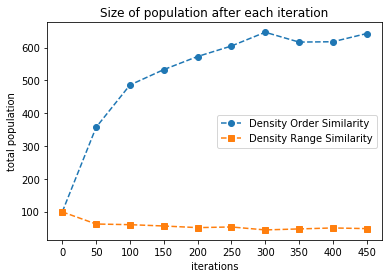

In [120]:
def parse_pop_file(data_list):
    gen, pop = [], []
    for data in data_list:
        gen.append(data[0])
        pop.append(int(data[3]))
    return gen, pop

pop_range=25 # total cells in the grid

ordersimi_totalpop = read_file("data/preliminary_ordersimilarity_result")
gen0, pop0 = parse_pop_file(ordersimi_totalpop)

rangesimi_totalpop = read_file("data/preliminary_rangesimilarity_result")
gen1, pop1 = parse_pop_file(rangesimi_totalpop)

x_generations = [gen0[x] for x in range(0, len(gen0), pop_range)]

y_order_simi = [sum(pop0[i:i+pop_range]) for i in  range(0, len(pop0), pop_range)]
y_range_simi = [sum(pop1[i:i+pop_range]) for i in  range(0, len(pop1), pop_range)]

plt.plot(x_generations, y_order_simi, "o", linestyle='--', label="Density Order Similarity")
plt.plot(x_generations, y_range_simi, "s", linestyle='--', label="Density Range Similarity")

plt.xlabel("iterations")
plt.ylabel("total population")
plt.title("Size of population after each iteration")
plt.legend()

plt.show()

### Checking how fitness changes for both similarity metrics

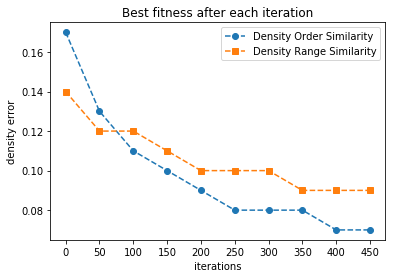

In [121]:
def parse_error_file(data):
    for i in range(len(data)):
        data[i][4] = float(data[i][4])
        if data[i][4] <= 0:
            data[i][4] = np.nan
    return data

pop_range=25 # total cells in the grid

ordersimi_result = read_file("data/preliminary_ordersimilarity_result")
ordersimi_result = parse_error_file(ordersimi_result)

rangesimi_result = read_file("data/preliminary_rangesimilarity_result")
rangesimi_result = parse_error_file(rangesimi_result)

# get the minimum error from the whole grid for each iteration of ordersimi data
ordersimi = [(ordersimi_result[i][0], min([ordersimi_result[j][4] for j in range(i,i+pop_range)])) for i in range(0, len(ordersimi_result), pop_range)]
x_ordersimi = [x[0] for x in ordersimi]
y_ordersimi = [x[1] for x in ordersimi]

# get the minimum error from the whole grid for each iteration of rangesimi data
rangesimi = [(rangesimi_result[i][0], min([rangesimi_result[j][4] for j in range(i,i+pop_range)])) for i in range(0, len(ordersimi_result), pop_range)]
x_rangesimi = [x[0] for x in rangesimi]
y_rangesimi = [x[1] for x in rangesimi]

plt.plot(x_ordersimi, y_ordersimi, "o", linestyle='--', label="Density Order Similarity")
plt.plot(x_rangesimi, y_rangesimi, "s", linestyle='--', label="Density Range Similarity")

plt.xlabel("iterations")
plt.ylabel("density error")
plt.title("Best fitness after each iteration")
plt.legend()

plt.show()

# Plotting function for Main Experiment

In [122]:
def get_heightmap_grid(population, accuracies, dim_size):
    # initialize a grid of values and a grid of labels with 0s
    grid = [[] for x in range(dim_size)]
    labels = [[] for x in range(dim_size)]
    for i in range(len(grid)):
        grid[i] = [0 for x in range(dim_size)]
        labels[i] = [0 for x in range(dim_size)]

    # parse values and labels from population and accuracies
    for i in range(len(population)):
        for j in range(len(population[i])):
            grid[i][j] = population[i][j]
            labels[i][j] = "{:.3f}".format(accuracies[(i*dim_size)+j]) if accuracies[(i*dim_size)+j] > 0 else "-"
        
    return grid, labels
    

def plot_heightmap(data, accuracies, generation, dim_size, total_buildings=165):
    grid, labels = get_heightmap_grid(data, accuracies, dim_size)
    plt.figure(figsize = (9,8))
    #annot = True            # for each cell, show no. of candidates
    annot = np.array(labels) # or for each cell, show accuracy of a candidate
    divs = total_buildings/dim_size      # single numbers in each cell 
    
    ax = sns.heatmap(grid, linewidth=0.5, annot=annot,fmt="", cbar=True, cbar_kws={'label': 'Population Size'},
                     xticklabels=[" {} - {}".format(i/dim_size, (i+1)/dim_size) for i in range(dim_size)], 
                     yticklabels=["{} - {}".format(int(165-((i+1)*divs)),int(165-(i*divs))) for i in range(0,dim_size)])
    plt.title("Population at generation {}".format(generation), fontsize = 14)
    plt.xlabel("Density Error", fontsize = 14)
    plt.ylabel("Total Buildings", fontsize = 14)
    plt.show()
    
import math
def plot(data, accuracies, gen, grid_size):
    dim_size = int(math.sqrt(grid_size))
    data_plot = []
    
    # parse total population for each cell at iteration gen
    for i in range(0, dim_size):
        data_plot.append([int(data[gen+(i*dim_size)+j][3]) for j in range(0,dim_size)])
    
    # reverse list so vertical axis go from 0 to max_buildings
    list.reverse(data_plot)
    
    # parse the sequential list of accuracies from file into an array of rows
    _accuracies = []
    for i in range(len(accuracies)-1, 0, -dim_size):
        _accuracies.append([accuracies[j-(dim_size-1)] for j in range(i, i+dim_size)])

    # rearange the obtained 2D array into a simple 1D array
    _accuracies = [_accuracies[i][j] for i in range(len(_accuracies)) for j in range(len(_accuracies[i]))]

    plot_heightmap(data_plot, _accuracies, gen, dim_size)

# MAP-Elites results

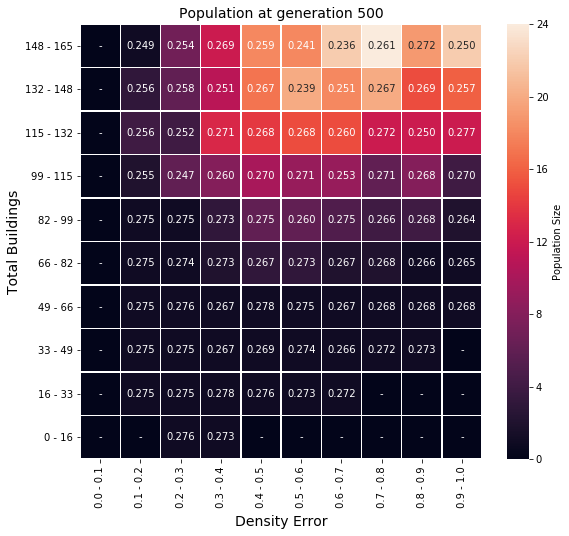

In [123]:
exp_result = read_file("data/final_threshold035_result")
for i in range(len(exp_result)):
    exp_result[i][4] = float(exp_result[i][4])
    if exp_result[i][4] <= 0:
        exp_result[i][4] = np.nan
        
exp_acc = read_file("data/final_threshold035_accuracies")
exp_acc = [float(a[0]) for a in exp_acc]
    
total_cells=100
gen_to_plot=500

plot(exp_result, exp_acc, gen_to_plot, total_cells)